In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Composición

In [2]:
#CONSTANTES
R  = 8.314                  # Constante de Gases Ideales
T0 = 273.15                # Temperatura en K
Lo = 333.6                  # Calor latente del agua a T0

T = np.array([-40, -30, -20, -10, -7, -5, -4.5, -4, -2, 0, 10, 20])     #Temperaturas [°C] 

xs              = 0.338     # Solidos Solubles 
humedad         = 0.662     # [%]
fibra           = 0         # [%]
lipidos         = 0         # [%]
cenizas         = 0.037     # [%]
proteinas       = 0.073     # [%]
carbohidratos   = 0.228     # [%]

T_cong          = -4       #Temperatura de congelación [°C]

x_hielo         = np.where(T >= T_cong, 0, humedad * (1 - (T_cong / T)))    #Fracción de hielo a cada temperatura
x_agua          = humedad - x_hielo                                         #Fracción de agua  a cada temperatura

total            = humedad + fibra + cenizas + proteinas + carbohidratos    #Suma de todas los componenetes debe de ser igual a 1.
print('Total: ', total)


composicion = np.vstack([proteinas      * np.ones_like(T), 
                         lipidos        * np.ones_like(T), 
                         carbohidratos  * np.ones_like(T), 
                         fibra          * np.ones_like(T), 
                         cenizas        * np.ones_like(T), 
                         x_agua, 
                         x_hielo])

Total:  1.0


C:\Users\Camilo\AppData\Local\Temp\ipykernel_3164\3717742892.py:18: RuntimeWarning: divide by zero encountered in divide
  x_hielo         = np.where(T >= T_cong, 0, humedad * (1 - (T_cong / T)))    #Fracción de hielo a cada temperatura


## Cálculo Densidad

In [3]:
rho_protein         = 1.3299e3 - (5.1840e-1 * T)
rho_lipidos         = 9.2559e2 - (4.1757e-1 * T)
rho_carbohidratos   = 1.5991e3 - (3.1046e-1 * T)
rho_fibra           = 1.3115e3 - (3.6589e-1 * T)
rho_cenizas         = 2.4238e3 - (2.8063e-1 * T)
rho_agua            = 9.9718e2 + (3.1439e-3 * T) - (3.7574e-3 * T**2)
rho_hielo           = 9.1689e2 - (1.3071e-1 * T)

rho_i = np.vstack([rho_protein, rho_lipidos, rho_carbohidratos, rho_fibra, rho_cenizas, rho_agua, rho_hielo])
rho_extracto = 1/ (np.sum(composicion / rho_i , axis=0))

In [4]:
# Creando el DataFrame
df = pd.DataFrame({
    'Temperatura'       : T,
    'rho_protein'       : rho_protein,
    'rho_grasa'         : rho_lipidos,
    'rho_carbohidratos' : rho_carbohidratos,
    'rho_fibra'         : rho_fibra,
    'rho_cenizas'       : rho_cenizas,
    'rho_agua'          : rho_agua,
    'rho_hielo'         : rho_hielo,
    'x_ice'             : x_hielo,
    'x_agua'            : x_agua,
    'rho_ext'           : rho_extracto,
})

df.set_index('Temperatura', inplace=True)
df

,rho_protein,rho_grasa,rho_carbohidratos,rho_fibra,rho_cenizas,rho_agua,rho_hielo,x_ice,x_agua,rho_ext
Temperatura,,,,,,,,,,
-40.0,1350.6360,942.292800,1611.51840,1326.135600,2435.025200,991.042404,922.118400,0.595800,0.066200,1082.667880
-30.0,1345.4520,938.117100,1608.41380,1322.476700,2432.218900,993.704023,920.811300,0.573733,0.088267,1083.278653
-20.0,1340.2680,933.941400,1605.30920,1318.817800,2429.412600,995.614162,919.504200,0.529600,0.132400,1086.164022
-10.0,1335.0840,929.765700,1602.20460,1315.158900,2426.606300,996.772821,918.197100,0.397200,0.264800,1098.329068
-7.0,1333.5288,928.512990,1601.27322,1314.061230,2425.764410,996.973880,917.804970,0.283714,0.378286,1109.954108
-5.0,1332.4920,927.677850,1600.65230,1313.329450,2425.203150,997.070345,917.543550,0.132400,0.529600,1126.205540
-4.5,1332.2328,927.469065,1600.49707,1313.146505,2425.062835,997.089765,917.478195,0.073556,0.588444,1132.705884
-4.0,1331.9736,927.260280,1600.34184,1312.963560,2424.922520,997.107306,917.412840,0.000000,0.662000,1140.960943
-2.0,1330.9368,926.425140,1599.72092,1312.231780,2424.361260,997.158683,917.151420,0.000000,0.662000,1140.873316


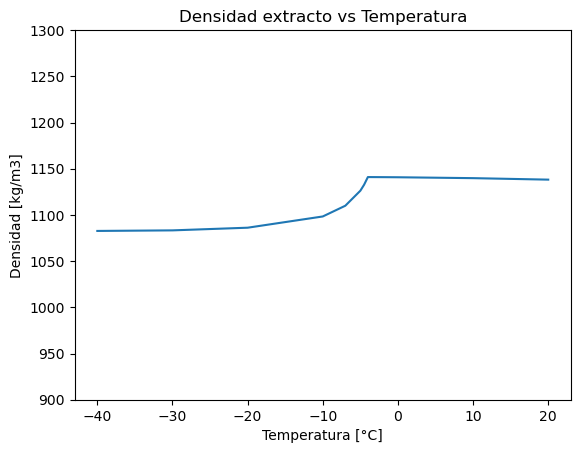

In [5]:
plt.figure()
plt.plot(T,rho_extracto)
plt.title('Densidad extracto vs Temperatura')
plt.xlabel('Temperatura [°C]')
plt.ylabel('Densidad [kg/m3]')
plt.ylim([900,1300])
plt.show()

#### Fase exponencial

rho =  [3.66217628e-04 3.70277601e-02 1.33514017e+00 2.05804939e+01
 1.20196029e+03]  (Recuerde cambiar este valor en equation para que modifique el texto del grafico)


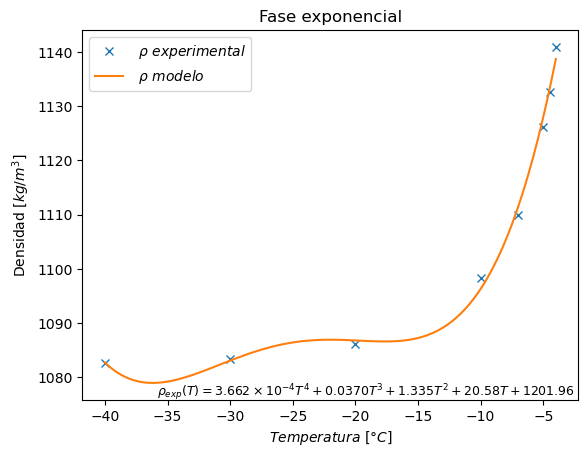

In [6]:
rho_exp = rho_extracto[T <= T_cong]    # Toma los valores de densidad donde la Temperatura era menor o igual que la T de congelación
T_exp   = T[T <= T_cong]               # Toma los valores de Temperatura que son menores que T de congelación

coeficientes_exp    = np.polyfit(T_exp, rho_exp, 4)                 # Realiza una regresión lineal de 4to grado
polinomio_exp       = np.poly1d(coeficientes_exp)                   # Crea el polinomio con los coeficientes de la regresión
T_funcion_exp       = np.linspace(T_exp[0], T_exp[-1], 400)         # Crea el vector de temperatura donde evaluará la función
rho_funcion_exp     = polinomio_exp(T_funcion_exp)                  # Evalúa la función en las temperaturas dadas anteriormente

print('rho = ',coeficientes_exp, ' (Recuerde cambiar este valor en equation para que modifique el texto del grafico)')

ecuacion_exp = r"$ \rho_{exp}(T) = 3.662 \times 10^{-4} T^4 + 0.0370 T^3 + 1.335 T^2 + 20.58 T + 1201.96 $" # Esta es la ecuación resultante (Se podría automatizar, aún está manual)

plt.figure()
plt.plot(T_exp,rho_exp, 'x', label= r" $ \rho~experimental $ ")
plt.plot(T_funcion_exp, rho_funcion_exp, label= r" $\rho~modelo $" )
plt.title("Fase exponencial")
plt.xlabel(r"$ Temperatura~[°C] $")
plt.ylabel(r"Densidad $ [kg/m^3] $")
plt.annotate(ecuacion_exp, xy=(0.15, 0.01), xycoords='axes fraction', fontsize=9)

plt.legend()
plt.show()

$ \rho(T) = 3.662 \times 10^{-4} T^4 + 0.0370 T^3 + 1.335 T^2 + 20.58 T + 1201.96 $

#### Fase constante

rho =  [-3.26115127e-03 -6.34862268e-02  1.14075944e+03]  (Recuerde cambiar este valor en equation para que modifique el texto del grafico)


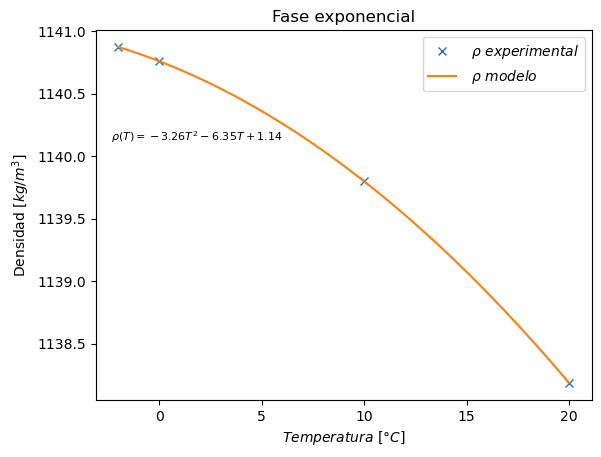

In [7]:
rho_cte = rho_extracto[T > T_cong]      # Toma los valores de densidad donde la Temperatura era menor o igual que la T de congelación
T_cte   = T[T > T_cong]                 # Toma los valores de Temperatura que son menores que T de congelación

coeficientes_cte    = np.polyfit(T_cte, rho_cte, 2)             # Realiza una regresión lineal de 4to grado
polinomio_cte      = np.poly1d(coeficientes_cte)                # Crea el polinomio con los coeficientes de la regresión
T_funcion_cte        = np.linspace(T_cte[0], T_cte[-1], 400)    # Crea el vector de temperatura donde evaluará la función
rho_funcion_cte      = polinomio_cte(T_funcion_cte)             # Evalúa la función en las temperaturas dadas anteriormente

print('rho = ',coeficientes_cte, ' (Recuerde cambiar este valor en equation para que modifique el texto del grafico)')

ecuacion_cte = r"$ \rho(T) = -3.26 T^2 -6.35 T + 1.14 $"        # Esta es la ecuación resultante (Se podría automatizar, aún está manual)

plt.figure()
plt.plot(T_cte,rho_cte, 'x', label= r" $ \rho~experimental $ ")
plt.plot(T_funcion_cte, rho_funcion_cte, label= r" $\rho~modelo $" )
plt.title("Fase exponencial")
plt.xlabel(r"$ Temperatura~[°C] $")
plt.ylabel(r"Densidad $ [kg/m^3] $")
plt.annotate(ecuacion_cte, xy=(0.03, 0.7), xycoords='axes fraction', fontsize=8)

plt.legend()
plt.show()

$ \rho(T) = -3.26 T^2 -6.35 T + 1.14 $

## Cálculo Cp

In [8]:
# Como se usan temperaturas diferentes a las del cálculo de densidad, se crea un nuevo vector, solo para validación... luego se pueden unificar
T_cp = np.array([-40, -35, -30, -25, -20, -12.8, -10, -7, -5, -4.5, -4, -3, 0, 1, 5, 10, 15, 20, 25])     #Temperaturas [°C] 
xb = 0.4 * proteinas                                                                # Fracción de agua que no se congela
Ms = -(xs * R * T0**2) / ((humedad - xb) * Lo * T_cong)                             # Masa molecular relativa de solidos solubles en la comida
x_hielo         = np.where(T_cp >= T_cong, 0, humedad * (1 - (T_cong / T_cp)))      #Fracción de hielo a cada temperatura
x_agua          = humedad - x_hielo                                                 #Fracción de agua  a cada temperatura

total            = humedad + fibra + cenizas + proteinas + carbohidratos            #Suma de todas los componenetes debe de ser igual a 1.
print('Total: ', total)


composicion = np.vstack([proteinas      * np.ones_like(T_cp), 
                         lipidos        * np.ones_like(T_cp), 
                         carbohidratos  * np.ones_like(T_cp), 
                         fibra          * np.ones_like(T_cp), 
                         cenizas        * np.ones_like(T_cp), 
                         x_agua, 
                         x_hielo
                         ])



#Usamos una mascara para calcular unicamente los Cp de T menor a la T de congelación
mask = T_cp < T_cong
cp_extracto = np.zeros_like(T_cp)
cp_extracto[mask] = 1.55 + 1.26 * xs + ( (xs * R * T0**2 ) / (Ms * T_cp[mask]**2 ) )

Total:  1.0


C:\Users\Camilo\AppData\Local\Temp\ipykernel_3164\2384667176.py:5: RuntimeWarning: divide by zero encountered in divide
  x_hielo         = np.where(T_cp >= T_cong, 0, humedad * (1 - (T_cong / T_cp)))      #Fracción de hielo a cada temperatura


In [9]:
cp_protein         = 2.0082 + (1.2089e-3 * T_cp) - (1.3129e-6 * T_cp**2)
cp_lipidos         = 1.9842 + (1.4733e-3 * T_cp) - (4.8008e-6 * T_cp**2)
cp_carbohidratos   = 1.5488 + (1.9625e-3 * T_cp) - (5.9399e-6 * T_cp**2)
cp_fibra           = 1.8459 + (1.8306e-3 * T_cp) - (4.4609e-6 * T_cp**2)
cp_cenizas         = 1.0926 + (1.8896e-3 * T_cp) - (3.6817e-6 * T_cp**2)
cp_hielo           = 2.0623 + (6.0769e-3 * T_cp) 
cp_agua            = np.where(T_cp <= 0,  4.1289 - (5.3062e-3 * T_cp) + (9.9516e-4 * T_cp**2) , 4.1289 - (9.0864e-5 * T_cp) + (5.4731e-6 * T_cp**2))

# Reorganizamos la matriz para cp's
cp_matrix = np.vstack([cp_protein, cp_lipidos, cp_carbohidratos, cp_fibra, cp_cenizas, cp_agua, cp_hielo ])

# La máscara se usa para cambiar unicamente los valores de Cp con T mayor a T de congelación
cp_extracto[~mask] = np.sum(composicion[:, ~mask] * cp_matrix[:, ~mask], axis=0)


In [10]:
# Creando el DataFrame
df = pd.DataFrame({
    'Temperatura'       : T_cp,
    'cp_protein'       : cp_protein,
    'cp_grasa'         : cp_lipidos,
    'cp_carbohidratos' : cp_carbohidratos,
    'cp_fibra'         : cp_fibra,
    'cp_cenizas'       : cp_cenizas,
    'cp_agua'          : cp_agua,
    'cp_hielo'         : cp_hielo,
    'cp_ext'           : cp_extracto,
})

df.set_index('Temperatura', inplace=True)
df

,cp_protein,cp_grasa,cp_carbohidratos,cp_fibra,cp_cenizas,cp_agua,cp_hielo,cp_ext
Temperatura,,,,,,,,
-40.0,1.957743,1.917587,1.460796,1.765539,1.011125,5.933404,1.819224,2.503635
-35.0,1.964280,1.926754,1.472836,1.776364,1.021954,5.533688,1.849608,2.665193
-30.0,1.970751,1.935680,1.484579,1.786967,1.032598,5.183730,1.879993,2.914111
-25.0,1.977157,1.944367,1.496025,1.797347,1.043059,4.883530,1.910378,3.326933
-20.0,1.983497,1.952814,1.507174,1.807504,1.053335,4.633088,1.940762,4.086901
-12.8,1.992511,1.964555,1.522707,1.821737,1.067810,4.359866,1.984516,7.129739
-10.0,1.995980,1.968987,1.528581,1.827148,1.073336,4.281478,2.001531,10.419963
-7.0,1.999673,1.973652,1.534771,1.832867,1.079192,4.214806,2.019762,19.208703
-5.0,2.002123,1.976713,1.538839,1.836635,1.083060,4.180310,2.031916,35.752213


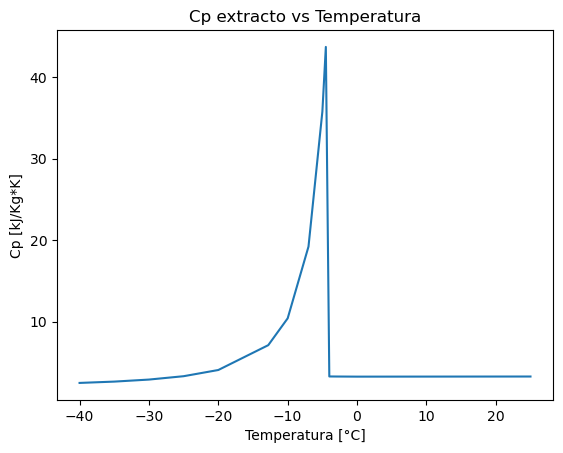

In [11]:
plt.figure()
plt.plot(T_cp,cp_extracto)
plt.title('Cp extracto vs Temperatura')
plt.xlabel('Temperatura [°C]')
plt.ylabel('Cp [kJ/Kg*K]')
plt.show()

rho =             5           4          3         2
2.033e-05 x + 0.00253 x + 0.1203 x + 2.726 x + 29.65 x + 130.3  (Recuerde cambiar este valor en equation para que modifique el texto del grafico)


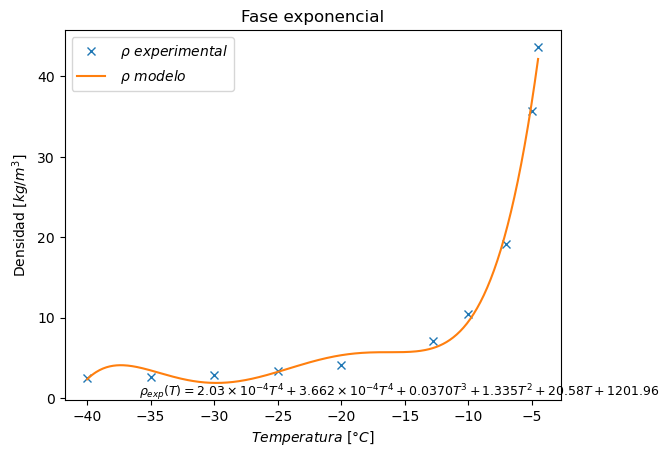

In [24]:
cp_exp = cp_extracto[T_cp < T_cong]    # Toma los valores de densidad donde la Temperatura era menor o igual que la T de congelación
T_exp_cp   = T_cp[T_cp < T_cong]               # Toma los valores de Temperatura que son menores que T de congelación

coeficientes_exp_cp    = np.polyfit(T_exp_cp, cp_exp, 5)                 # Realiza una regresión lineal de 4to grado
polinomio_exp_cp       = np.poly1d(coeficientes_exp_cp)                   # Crea el polinomio con los coeficientes de la regresión
T_funcion_exp_cp       = np.linspace(T_exp_cp[0], T_exp_cp[-1], 400)         # Crea el vector de temperatura donde evaluará la función
cp_funcion_exp     = polinomio_exp_cp(T_funcion_exp_cp)                  # Evalúa la función en las temperaturas dadas anteriormente

print('rho = ',polinomio_exp_cp, ' (Recuerde cambiar este valor en equation para que modifique el texto del grafico)')

ecuacion_exp = r"$ \rho_{exp}(T) = 2.03 \times 10^{-4} T^4 + 3.662 \times 10^{-4} T^4 + 0.0370 T^3 + 1.335 T^2 + 20.58 T + 1201.96 $" # Esta es la ecuación resultante (Se podría automatizar, aún está manual)

plt.figure()
plt.plot(T_exp_cp,cp_exp, 'x', label= r" $ \rho~experimental $ ")
plt.plot(T_funcion_exp_cp, cp_funcion_exp, label= r" $\rho~modelo $" )
plt.title("Fase exponencial")
plt.xlabel(r"$ Temperatura~[°C] $")
plt.ylabel(r"Densidad $ [kg/m^3] $")
plt.annotate(ecuacion_exp, xy=(0.15, 0.01), xycoords='axes fraction', fontsize=9)

plt.legend()
plt.show()

In [30]:
cp_cte = cp_extracto[T_cp > T_cong]    # Toma los valores de densidad donde la Temperatura era menor o igual que la T de congelación
T_cte_cp   = T_cp[T_cp > T_cong]               # Toma los valores de Temperatura que son menores que T de congelación

[3.28811915 3.273483   3.2740305  3.27626124 3.27914131 3.28212323
 3.28520699 3.28839259]
[-3.  0.  1.  5. 10. 15. 20. 25.]


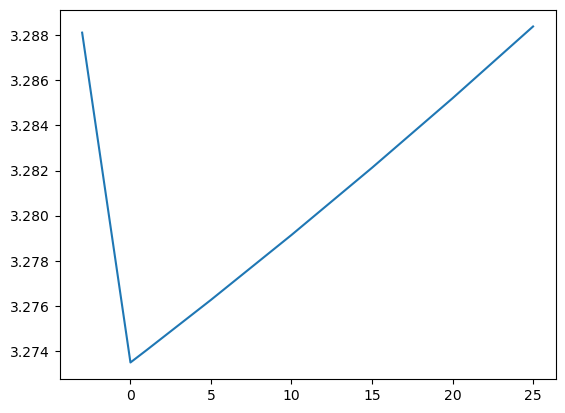

In [31]:
plt.plot(T_cte_cp,cp_cte)
print(cp_cte)
print(T_cte_cp)